# Assignment

Please download the dataset  from below link:
https://drive.google.com/file/d/17zzIViJcRZEX168MC6g21LIlPapgMZPg/view?usp=sharing

The dataset provided (traffic.csv) contains web traffic data, referred to as "events," from several different pages, identified as "links," over a 7-day period. The dataset includes various categorical dimensions such as the geographic origin of the traffic and the content of the page (indicated by isrc). Your task is to use this data to derive meaningful insights and support your analysis with appropriate statistical methods.

The objective of this project is to gain a deeper understanding of the web traffic data, specifically focusing on the volume and distribution of events, and to explore strategies for increasing the click-through rates (CTR) of the links. You will analyze the provided dataset using Python libraries such as Pandas and SciPy to answer the following questions:
1. Total and Daily Pageview Events:
- How many total pageview events did the links in the dataset receive during the entire period?
- What is the average number of pageview events per day?
2. Analysis of Other Events:
- What is the total count and distribution of other recorded events in the dataset?
3. Geographical Distribution:
- Which countries contributed to the pageviews?
4. Click-Through Rate (CTR) Analysis:
- What is the overall click-through rate (CTR) calculated as clicks/pageviews?
- How does the CTR vary across different links?
5. Correlation Analysis:
- Is there a correlation between clicks and previews on a link? If so, is it statistically significant, and how strong is the effect?
- Perform tests for both potential linear relationships and categorical (binary) relationships between these variables


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import scipy.stats as stats


In [2]:
df = pd.read_csv('/content/traffic.csv')
df.sample(10)

,event,date,country,city,artist,album,track,isrc,linkid
68859,preview,2021-08-24,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
165083,pageview,2021-08-19,Norway,Oslo,"Vandelux, Alex Maher",Matter of Time (feat. Alex Maher),Matter of Time (feat. Alex Maher),GBKPL2150049,c40647a1-b717-439b-a3c5-0f23ab4402ea
141233,pageview,2021-08-21,India,Patna,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
144629,pageview,2021-08-25,India,Srinagar,Tundra Beats,Beautiful Day,Beautiful Day,QZHN92194591,e849515b-929d-44c8-a505-e7622f1827e9
1334,click,2021-08-19,France,Saint-Jean-de-la-Ruelle,"Justin Quiles, Chimbala, Zion & Lennox",Loco,Loco,USWL12100223,6ec91846-dae0-448e-8afe-a775547c0fad
37051,click,2021-08-19,Bosnia and Herzegovina,Brcko,Bella Poarch,Build a Bitch,Build a Bitch,USWB12101016,a107c329-5d35-4c7d-8050-50bc69ce7dbc
196355,pageview,2021-08-23,Saudi Arabia,Jeddah,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
121734,pageview,2021-08-20,Iraq,Unknown,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
146752,pageview,2021-08-25,France,Guyancourt,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
6052,click,2021-08-20,Iraq,Erbil,"50 Cent, Olivia",The Massacre,Candy Shop,USIR10500072,97105aff-3e40-4c2e-bfeb-563b55e8f5dd


In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   event    226278 non-null  object        
 1   date     226278 non-null  datetime64[ns]
 2   country  226267 non-null  object        
 3   city     226267 non-null  object        
 4   artist   226241 non-null  object        
 5   album    226273 non-null  object        
 6   track    226273 non-null  object        
 7   isrc     219157 non-null  object        
 8   linkid   226278 non-null  object        
dtypes: datetime64[ns](1), object(8)
memory usage: 15.5+ MB


# object -> categorical

In [5]:
df.isnull().sum()

,0
event,0
date,0
country,11
city,11
artist,37
album,5
track,5
isrc,7121
linkid,0


In [6]:
df.shape

(226278, 9)

In [7]:
df['linkid'].nunique(), df['isrc'].nunique()

(3839, 709)

### Dropping country, city, artist, album, track because they contain negligible null values.

In [8]:
df.dropna(subset=['country', 'city', 'artist', 'album', 'track'], inplace=True)


In [9]:
df.shape


(226230, 9)

In [10]:
 df[df['isrc'].isnull()]

,event,date,country,city,artist,album,track,isrc,linkid
278,click,2021-08-20,United States,Philadelphia,YoungBoy Never Broke Again,Top,Boom,NaN,5f86ad60-5c3a-5996-8c4b-b32ccba46e6f
301,click,2021-08-20,United States,Front Royal,YNW Melly,We All Shine,Mixed Personalities (feat. Kanye West),NaN,457538c1-61e2-5f7b-914c-43e85177ec3a
302,click,2021-08-20,United States,Boca Raton,Little Big Town,Restoration: The Songs of Elton John and Berni...,Rocket Man,NaN,c25059fe-2763-5e66-9cce-84e9766d1c4b
305,click,2021-08-20,United States,Stillwater,Lofi Fruits Music,Steven Universe,Steven Universe,NaN,eb28ae21-888f-5440-bd79-05a631f5dccd
312,click,2021-08-20,United States,San Antonio,Sayyhuncho,None Regular,None Regular,NaN,a396942a-04b5-5cfa-9121-7a082081b489
...,...,...,...,...,...,...,...,...,...
226092,pageview,2021-08-19,United States,Lansing,KA$HDAMI,epiphany,ILY/Sincerely,NaN,83691506-2318-5a15-a7c8-602f055fed59
226166,pageview,2021-08-19,United States,San Antonio,Gucci Mane,Everybody Looking,No Sleep - Intro,NaN,9e186531-3b42-566e-a30b-003d56e9530f
226178,pageview,2021-08-20,United States,Snellville,Sammy Kershaw,Haunted Heart,She Don't Know She's Beautiful,NaN,2a20c79c-7578-5247-878b-a6b71fba3769
226181,pageview,2021-08-20,United States,Whitley City,Kiiara,low kii savage,Gold,NaN,ac33e71b-209d-5503-a276-14ca46372a81


In [11]:
df['isrc'].nunique()


709

In [12]:
df['linkid'].nunique()

3822

In [13]:
linkid_isrc_combination = df.groupby(['linkid', 'isrc'])['event'].count().reset_index(name='count').sort_values(by='count', ascending=False)
linkid_isrc_combination

,linkid,isrc,count
139,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,QZNWQ2070741,40841
252,522da5cc-8177-4140-97a7-a84fdb4caf1c,GBAHS2100225,10314
671,e849515b-929d-44c8-a505-e7622f1827e9,QZHN92194591,9750
556,c2c876ab-b093-4750-9449-6b4913da6af3,QZJRC1945204,6733
314,681d888a-59ce-4acb-b7c5-95dab0c063d9,GBSMU9833211,5512
...,...,...,...
487,a89b19ed-a083-4ba5-95c3-75c685e9b221,USUM72111591,1
686,ec36ba31-3314-453f-96eb-be1f3a0c7e3f,CA5KR2101974,1
596,cf7484e7-d24d-41da-ba10-d5bb375fd416,USUM71920950,1
683,eb8ac1a9-9e88-496c-b490-08a3bd20f322,USUM72112386,1


In [14]:
linkid_isrc_combination['count'][:10].sum()

98218

In [15]:
(1-(df.shape[0]-98221)/df.shape[0])*100

43.41643460195377

In [16]:
linkid_isrc_event_combination = df.groupby(['linkid', 'isrc', 'event'])['date'].count().reset_index(name='count').sort_values(by='count', ascending=False)
linkid_isrc_event_combination

,linkid,isrc,event,count
347,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,QZNWQ2070741,pageview,25175
346,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,QZNWQ2070741,click,9692
616,522da5cc-8177-4140-97a7-a84fdb4caf1c,GBAHS2100225,pageview,6600
1687,e849515b-929d-44c8-a505-e7622f1827e9,QZHN92194591,pageview,5981
348,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,QZNWQ2070741,preview,5974
...,...,...,...,...
344,2d84e933-c864-4520-a113-7107cc374ec4,USAT21501213,click,1
345,2d84e933-c864-4520-a113-7107cc374ec4,USAT21501213,pageview,1
1269,adad0876-def1-4078-9b77-59f85d35930e,QZ5FA1751993,click,1
1261,ac3ce89b-8ea6-48a3-a339-8806c0cc822a,NZUM72100178,preview,1


In [17]:
df[df['linkid']=='2d896d31-97b6-4869-967b-1c5fb9cd4bb8']

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
12,click,2021-08-20,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
24,click,2021-08-20,Romania,Topoloveni,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
...,...,...,...,...,...,...,...,...,...
226256,pageview,2021-08-23,Iraq,Erbil,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
226267,pageview,2021-08-24,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
226270,pageview,2021-08-24,United Arab Emirates,Abu Dhabi,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
226271,pageview,2021-08-24,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [18]:
df[df['isrc']=='QZNWQ2070741']


,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
12,click,2021-08-20,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
24,click,2021-08-20,Romania,Topoloveni,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
...,...,...,...,...,...,...,...,...,...
226256,pageview,2021-08-23,Iraq,Erbil,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
226267,pageview,2021-08-24,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
226270,pageview,2021-08-24,United Arab Emirates,Abu Dhabi,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
226271,pageview,2021-08-24,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [19]:
df[df['isrc']=='GBAHS2100225']


,event,date,country,city,artist,album,track,isrc,linkid
11,click,2021-08-20,United Arab Emirates,Dubai,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c
14,click,2021-08-20,Saudi Arabia,Riyadh,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c
19,click,2021-08-20,Saudi Arabia,Jeddah,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c
41,click,2021-08-22,Bangladesh,Dhaka,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c
117,click,2021-08-23,Saudi Arabia,Al Kharj,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c
...,...,...,...,...,...,...,...,...,...
226176,pageview,2021-08-19,Liberia,Robertsport,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c
226207,pageview,2021-08-21,Saudi Arabia,Jeddah,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c
226237,pageview,2021-08-25,Saudi Arabia,Jeddah,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c
226251,pageview,2021-08-23,United Kingdom,Birmingham,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c


## Top pageview and click goes to linkid "2d896d31-97b6-4869-967b-1c5fb9cd4bb8" and isrc "QZNWQ2070741" which belongs to artist "Tesher"	who has track song "Jalebi Baby". Second pageview goes to linkid "522da5cc-8177-4140-97a7-a84fdb4caf1c"	and isrc "GBAHS2100225" which belongs to artist "Anne-Marie"	with track "Beautiful".

<ipython-input-20-fd88eea398c4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=co, data=df, palette='bright', ax=ax[0], saturation=0.95)


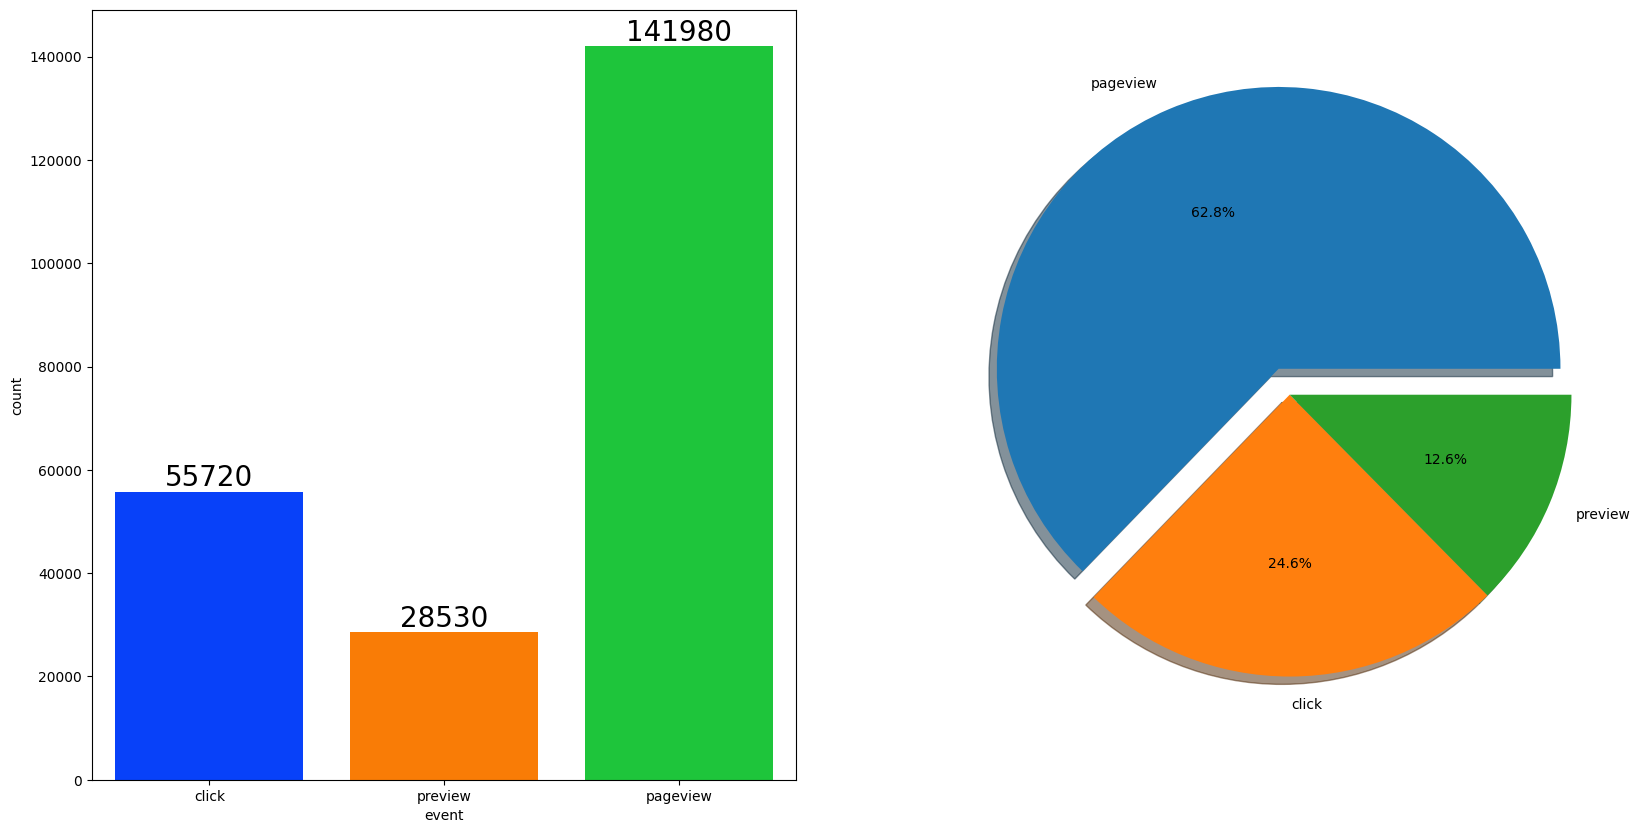

<ipython-input-20-fd88eea398c4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=co, data=df, palette='bright', ax=ax[0], saturation=0.95)


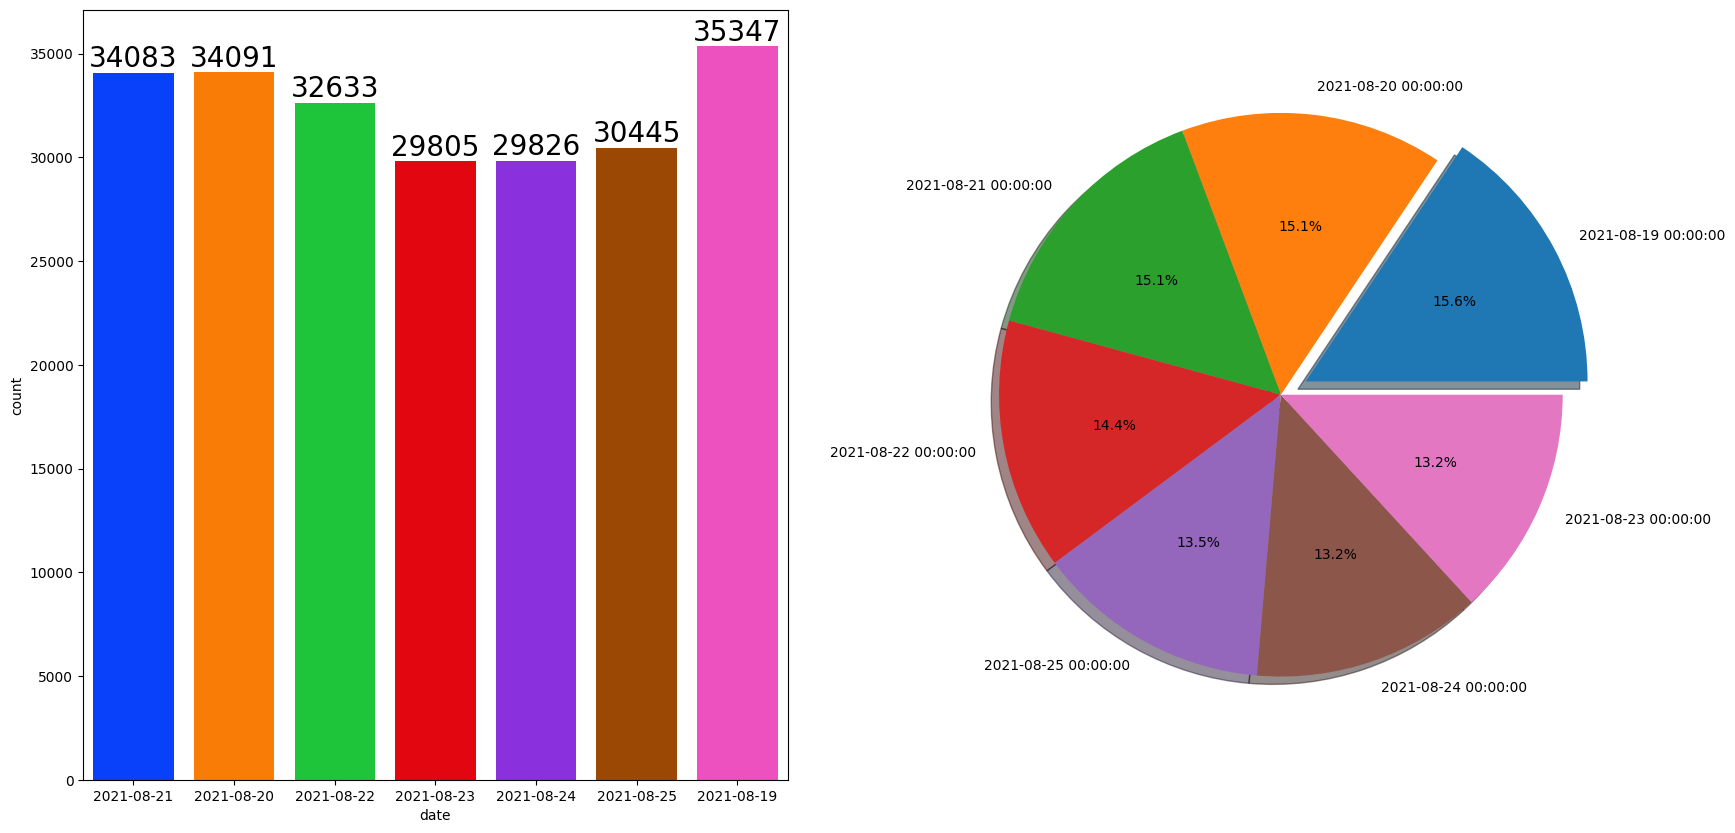

In [20]:
cat_col = ['event', 'date']

for co in cat_col:
    f, ax = plt.subplots(1, 2, figsize=(20, 10))

    # Countplot in the first subplot
    sns.countplot(x=co, data=df, palette='bright', ax=ax[0], saturation=0.95)

    for container in ax[0].containers:
        ax[0].bar_label(container, color='black', size=20)

    # Pie chart in the second subplot
    counts = df[co].value_counts()
    explode = [0.1 if count == max(counts) else 0 for count in counts]
    ax[1].pie(x=counts, labels=counts.index, explode=explode, autopct='%1.1f%%', shadow=True)

    plt.show()

In [21]:
pd.crosstab(df['event'], df['date'])

date,2021-08-19,2021-08-20,2021-08-21,2021-08-22,2021-08-23,2021-08-24,2021-08-25
event,,,,,,,
click,9203,8501,8071,7854,7314,7301,7476
pageview,22356,21368,21349,20430,18645,18685,19147
preview,3788,4222,4663,4349,3846,3840,3822


In [24]:
event_date_crosstab = pd.crosstab(df['event'], df['date'])
event_date_crosstab.mean(axis=1)

,0
event,
click,7960.000000
pageview,20282.857143
preview,4075.714286


#Observations:

Total and Daily Pageview Events:

1. How many total pageview events did the links in the dataset receive during the entire period?

2. What is the average number of pageview events per day?


- 1 -> Around 62% events are pageviews.
- 2 ->  average number of pageview events per day is 20282


3. What is the total count and distribution of other recorded events in the dataset?

- Simiarily, click contribute 34% to the total event and preview contribute 18%.
- Average no of click and preview per day are 7960 and 4075 respectively.

In [25]:
df.isnull().sum()

,0
event,0
date,0
country,0
city,0
artist,0
album,0
track,0
isrc,7081
linkid,0


In [26]:
df['country'].value_counts()[:10]

,count
country,
Saudi Arabia,47334
India,42992
United States,32525
France,15661
Iraq,8260
United Kingdom,5970
Pakistan,5644
Germany,4792
United Arab Emirates,3702


In [27]:
df['city'].value_counts()[:10]

,count
city,
Jeddah,22791
Riyadh,17454
Unknown,16653
Hyderabad,3682
Dammam,3276
Erbil,3105
Kuwait City,3010
Lucknow,2808
Muscat,2717


## Total event count per day

In [28]:
df.groupby('date')['event'].count()

,event
date,
2021-08-19,35347
2021-08-20,34091
2021-08-21,34083
2021-08-22,32633
2021-08-23,29805
2021-08-24,29826
2021-08-25,30445


<Axes: title={'center': 'Daily Events'}, xlabel='date'>

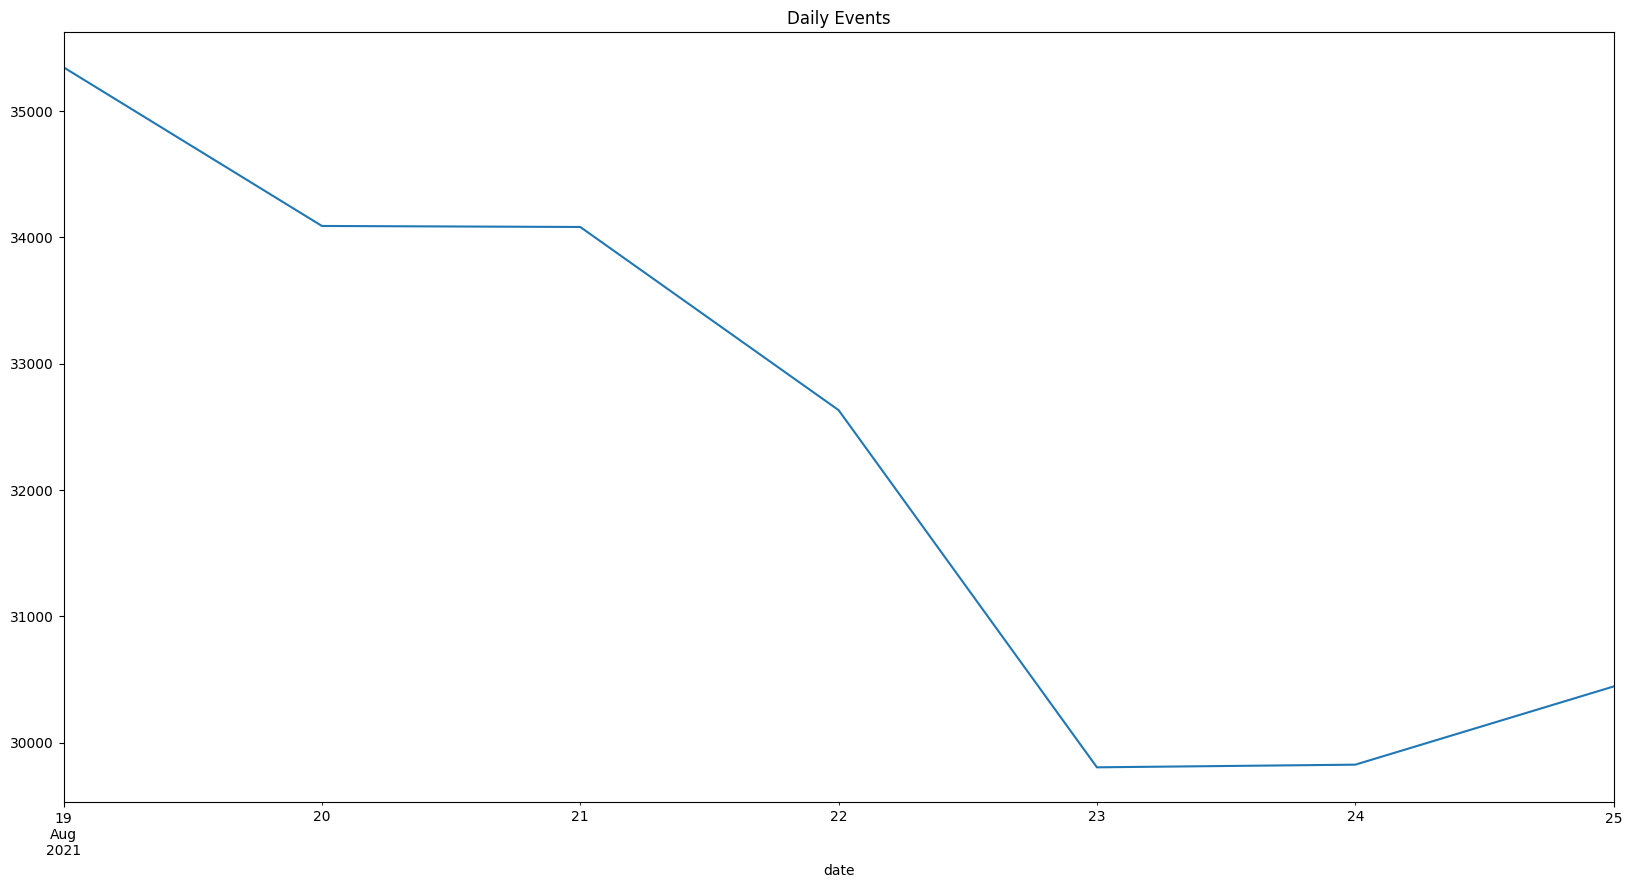

In [29]:
df.groupby('date')['event'].count().plot(figsize=(20,10), title='Daily Events')

## There is a decrease in the trend/search over the given period.


In [30]:
df.groupby('date')['event'].count().mean()

32318.571428571428

## On a average 32318.57 are taking place overall.

- For pageview per day is -> **20282**
- For click per day is -> **7960**
- For preview per day avg is -> **4075**


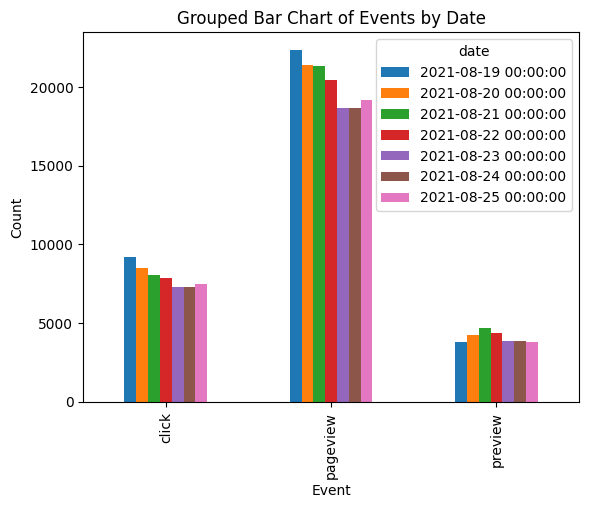

In [31]:
cross_tab = pd.crosstab(df['event'], df['date'])

cross_tab.plot(kind='bar', stacked=False)
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('Grouped Bar Chart of Events by Date')
plt.show()


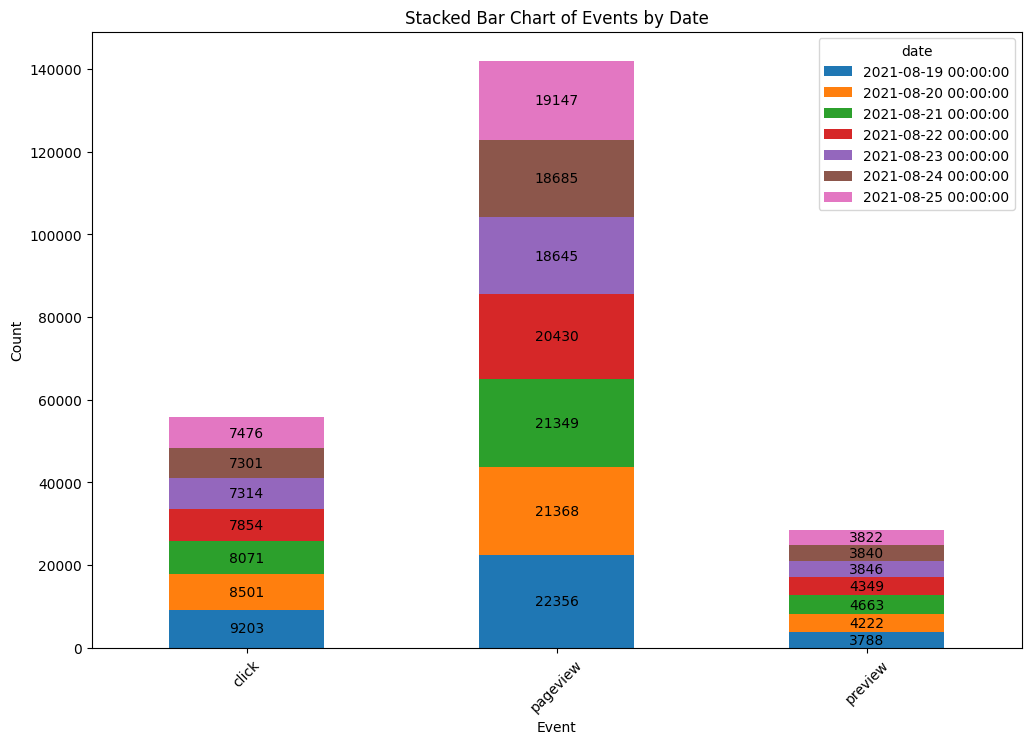

In [32]:
cross_tab = pd.crosstab(df['event'], df['date'])

# Plot the stacked bar chart
ax = cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add numbers on top of the bars
for container in ax.containers:
    # Get the offset for each bar in the container
    labels = [f'{int(v.get_height())}' for v in container if v.get_height() > 0]
    ax.bar_label(container, label_type='center', labels=labels)

# Set labels and title
plt.xlabel('Event')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Events by Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [33]:
def plot_event_counts_per_day(df):
    """
    Plot the number of clicks and pageviews per day using Plotly.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    """
    # Filter the DataFrame for 'clicks' and 'pageviews' events
    filtered_df = df[df['event'].isin(['click', 'pageview', 'preview'])]

    # Group by 'date' and 'event', then count the occurrences
    event_counts = filtered_df.groupby(['date', 'event']).size().reset_index(name='count')

    # Pivot the DataFrame to have 'date' as rows and 'event' types as columns
    pivot_df = event_counts.pivot(index='date', columns='event', values='count').fillna(0)

    # Create a line plot with Plotly Express
    fig = px.line(
        pivot_df,
        title='Daily Clicks and Pageviews',
        labels={'value': 'Count', 'date': 'Date'},
        markers=True
    )

    # Update layout for better appearance
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Count',
        xaxis_title_font=dict(size=14),
        yaxis_title_font=dict(size=14),
        xaxis_tickformat='%Y-%m-%d',  # Format the date on the x-axis
        xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
        plot_bgcolor='white'  # Set plot background color to white
    )

    # Show the plot
    fig.show()

# Example usage:
plot_event_counts_per_day(df)


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [34]:
df.groupby(['country', 'artist'])['event'].count().reset_index(name='count').sort_values(by='count', ascending=False)

,country,artist,count
8888,Saudi Arabia,Tesher,13080
4455,India,Tesher,8469
4760,Iraq,Tesher,3405
4177,India,Anne-Marie,2770
8593,Saudi Arabia,Anne-Marie,2690
...,...,...,...
6610,Nepal,Dixie,1
6609,Nepal,DMX,1
6608,Nepal,"DMNDS, Strange Fruits Music, Fallen Roses, Luj...",1
6607,Nepal,"DLJ, BIDØ",1


# Observations

- In Saudi, India and Iraq Tesher is the top artist, and similarily, Anne Marie songs are the second most loved artist in India and Saudi

In [35]:
sum(df['country'].value_counts()[:10].values)

170394

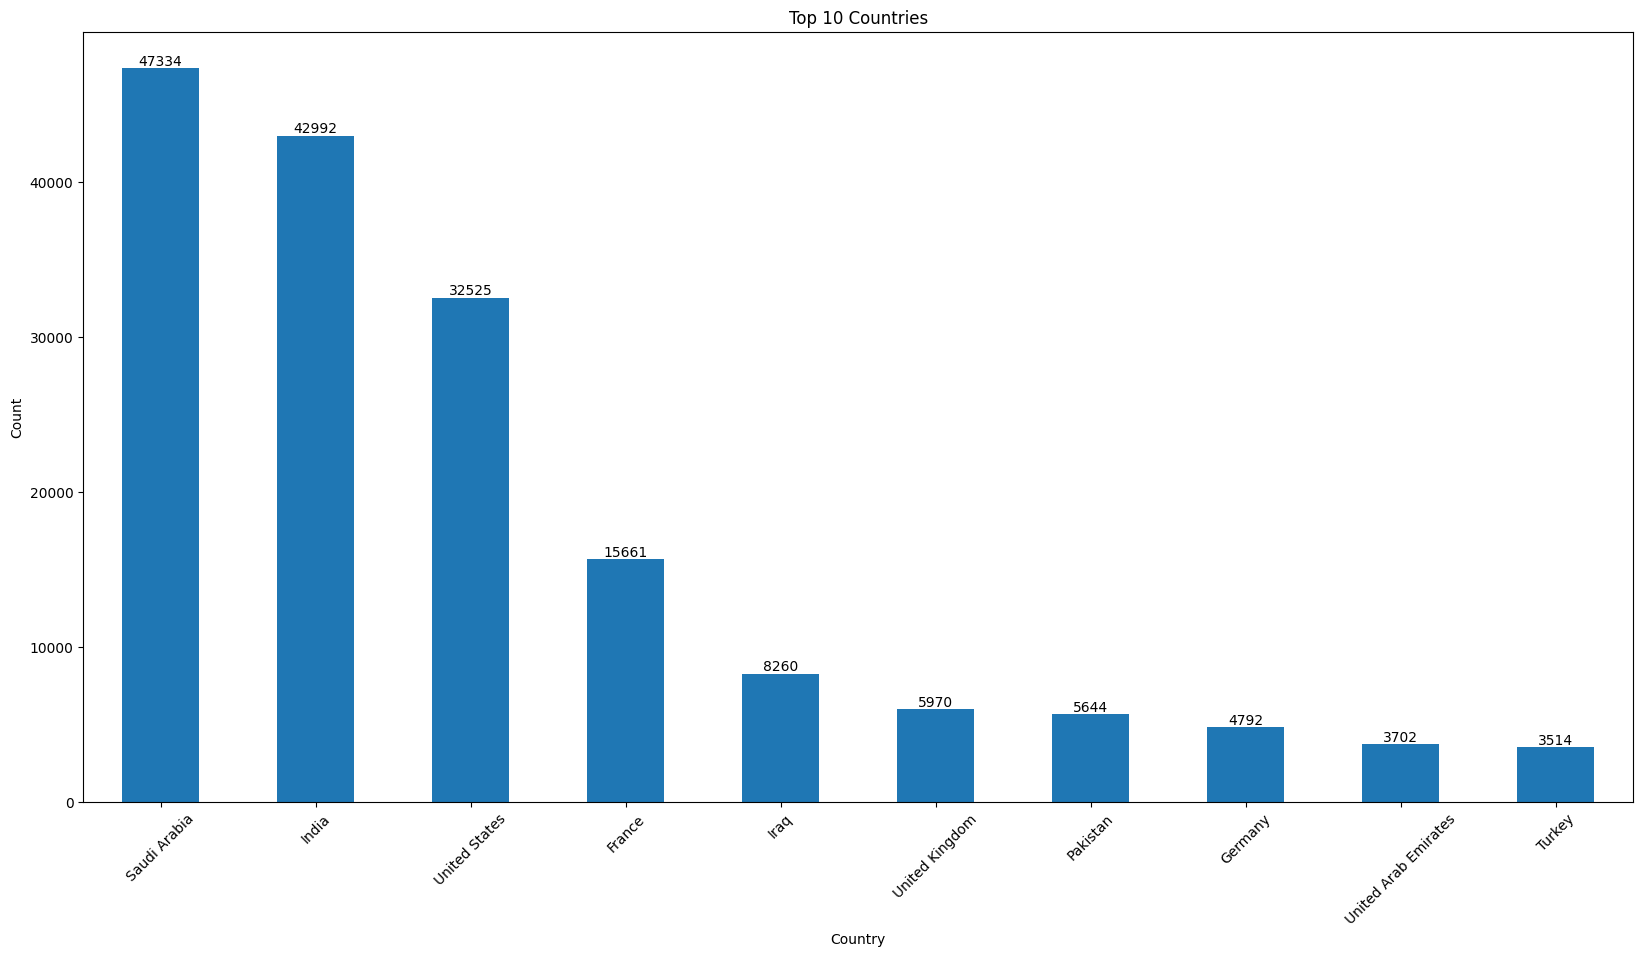

In [36]:
ax = df['country'].value_counts()[:10].plot(kind='bar', figsize=(20,10), title='Top 10 Countries')

# Add numbers on top of the bars
for i in ax.containers:
    ax.bar_label(i)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [37]:
def plot_top_n_plotly(df, column, n=10, title='Top N Values'):
    """
    Plot the top N values of a specified column in a DataFrame using Plotly.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    column (str): The column to analyze.
    n (int): The number of top values to display.
    title (str): Title of the plot.
    """
    # Get the top N values for the specified column
    top_n_values = df[column].value_counts().head(n).reset_index()
    top_n_values.columns = [column, 'count']

    # Create a bar plot with Plotly Express
    fig = px.bar(top_n_values, x=column, y='count', title=title, labels={column: column, 'count': 'Count'})

    # Update layout for better appearance
    fig.update_layout(
        xaxis_title=column,
        yaxis_title='Count',
        xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
        plot_bgcolor='white'  # Set plot background color to white
    )

    # Show the plot
    fig.show()

# Example usage:
plot_top_n_plotly(df, 'country', n=10, title='Top 10 Countries')

# Observations:

- In this dataset Saudi has the highest number of events 47334 followed by India 42992 and the US 32525.


In [38]:
def plot_event_country_contribution(df, top_n=10):
    """
    Plot the contribution of countries for each event type using Plotly and display the data for the top N events.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    top_n (int): The number of top events to display.
    """
    # Group by 'event' and 'country', then count the occurrences
    event_country_counts = df.groupby(['event', 'country']).size().reset_index(name='count').sort_values(by='count', ascending=False)

    # Find the top N events by total count
    top_events = event_country_counts.groupby('event')['count'].sum().nlargest(top_n).index

    # Filter the data to include only the top N events
    top_event_country_counts = event_country_counts[event_country_counts['event'].isin(top_events)]

    # Display the data for the top N events
    print("Top N Events Data:")
    print(top_event_country_counts[:10])


# Example usage:
plot_event_country_contribution(df, top_n=10)


Top N Events Data:
        event        country  count
368  pageview   Saudi Arabia  28873
290  pageview          India  27286
403  pageview  United States  20816
84      click          India  11609
267  pageview         France   9674
192     click  United States   9523
158     click   Saudi Arabia   9495
555   preview   Saudi Arabia   8966
293  pageview           Iraq   4897
490   preview          India   4097


## Analyzing top 10 countries

In [39]:

India_df = df[df['country']=="India"]
Saudi_Arabia_df = df[df['country']=="Saudi Arabia"]
France_df = df[df['country']=="France"]
United_States_df = df[df['country']=="United States"]
Iraq_df = df[df['country']=="Iraq"]
United_Kingdom_df = df[df['country']=="United Kingdom"]
Turkey_df = df[df['country']=="Turkey"]
Germany_df = df[df['country']=="Germany"]
Pakistan_df = df[df['country']=="Pakistan"]



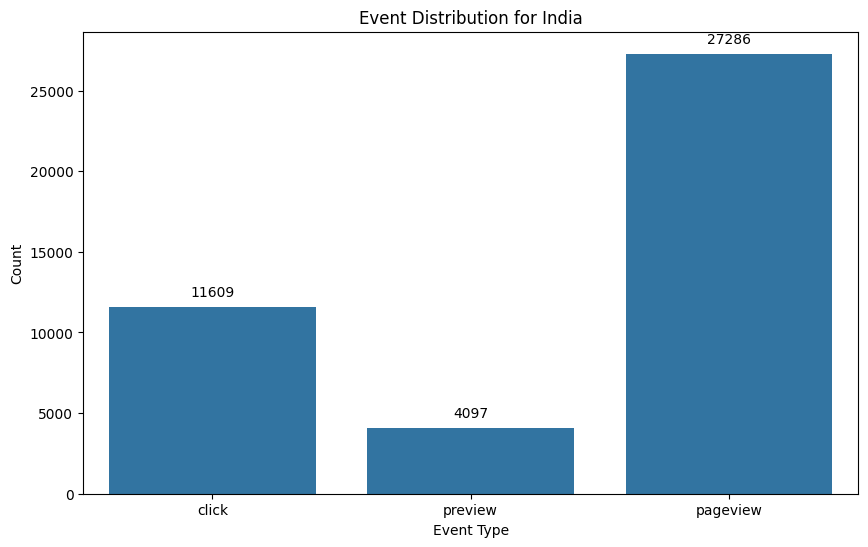

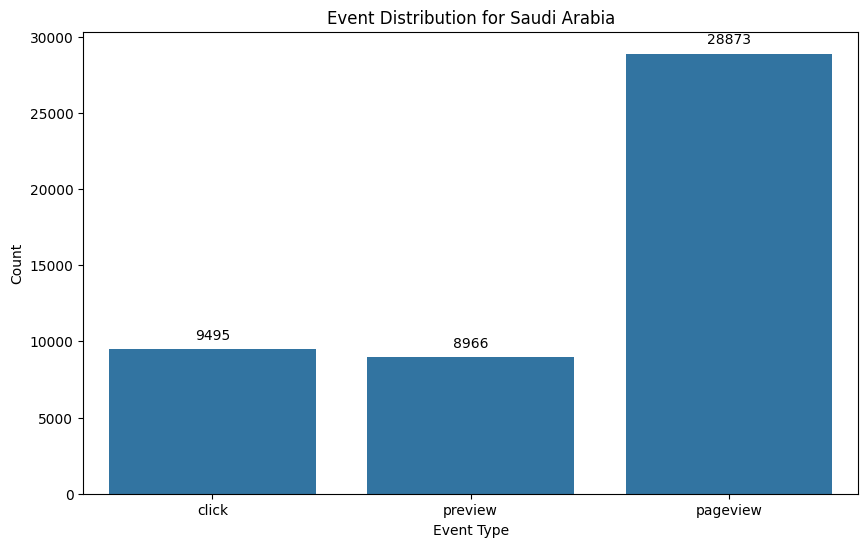

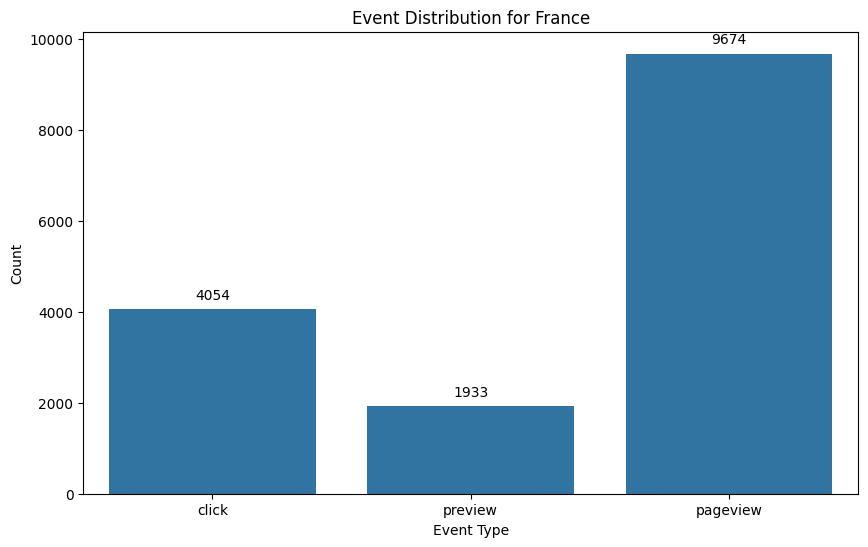

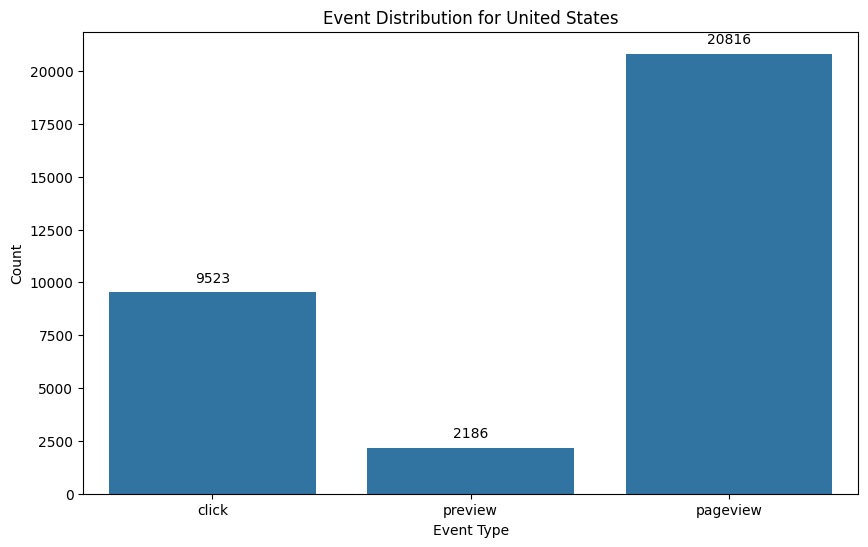

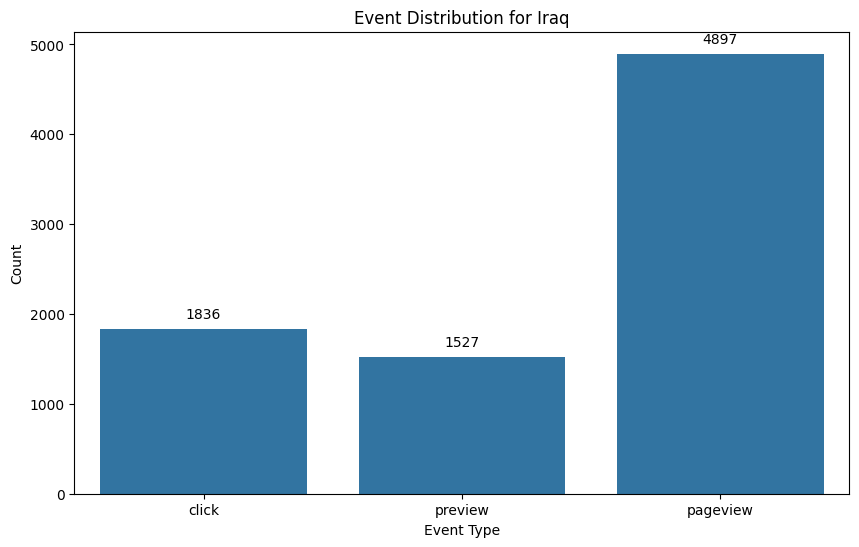

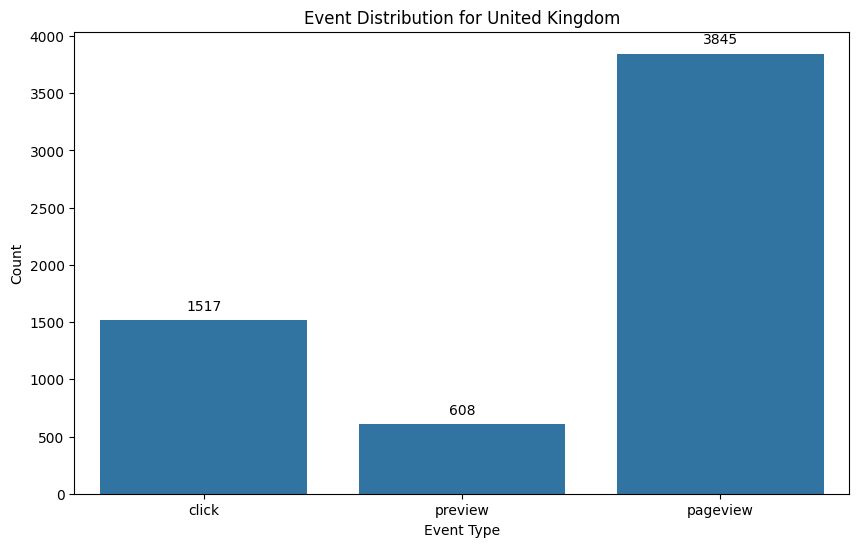

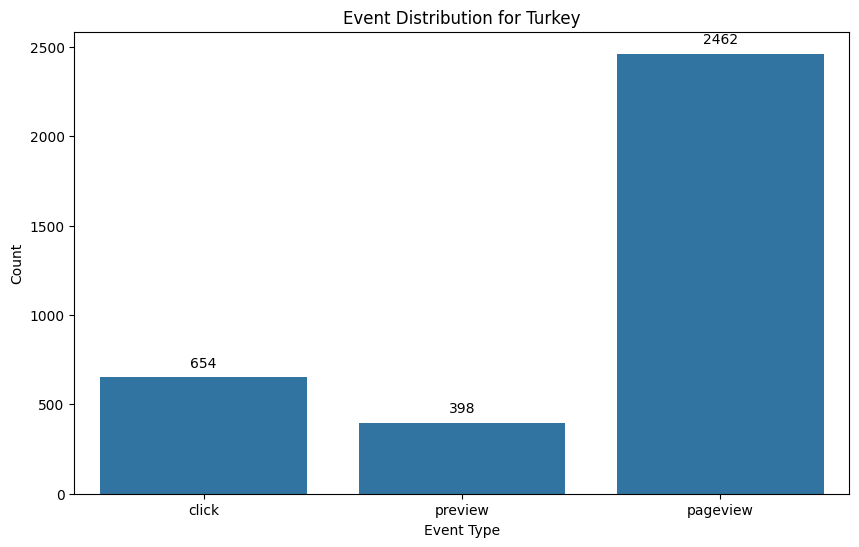

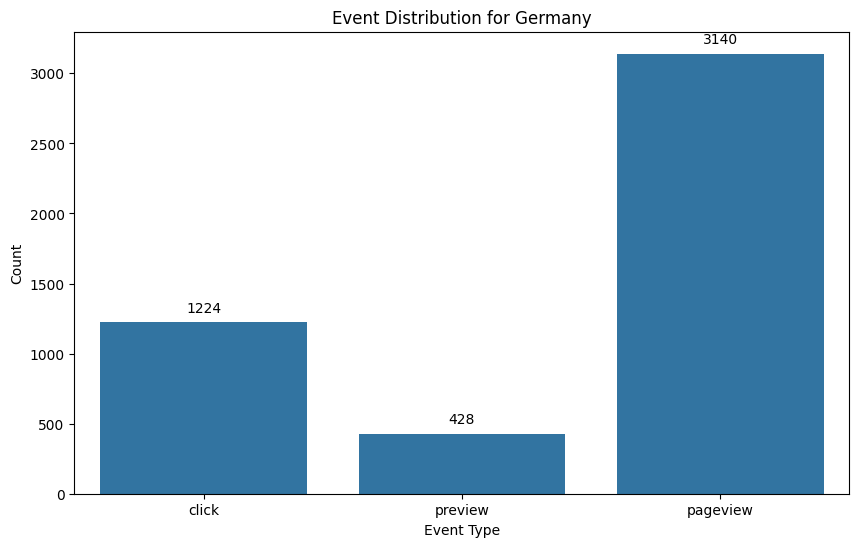

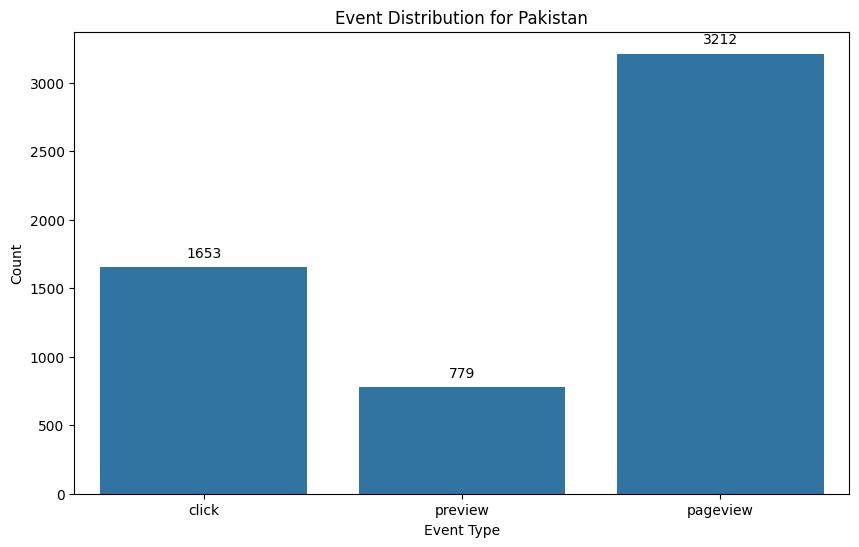

In [40]:
dfs = [
    (India_df, 'India'),
    (Saudi_Arabia_df, 'Saudi Arabia'),
    (France_df, 'France'),
    (United_States_df, 'United States'),
    (Iraq_df, 'Iraq'),
    (United_Kingdom_df, 'United Kingdom'),
    (Turkey_df, 'Turkey'),
    (Germany_df, 'Germany'),
    (Pakistan_df, 'Pakistan')
]

# Iterate over each DataFrame and plot
for dataframe, country_name in dfs:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x='event', data=dataframe)

    # Annotate the count on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points')

    plt.title(f'Event Distribution for {country_name}')
    plt.xlabel('Event Type')
    plt.ylabel('Count')
    plt.show()

## Analyzing and visualizing Countrywise CTR

In [41]:
ctr_list = []

# Iterate over the list of tuples containing the DataFrame and country name
for dataframe, country_name in dfs:
    # Step 1: Filter the data for "click" and "pageview" events within the specific country
    clicks = dataframe[dataframe['event'] == 'click']
    pageviews = dataframe[dataframe['event'] == 'pageview']

    # Step 2: Count the number of "clicks" and "pageviews" for the country
    click_count = clicks.shape[0]
    pageview_count = pageviews.shape[0]

    # Step 3: Calculate the CTR
    ctr = click_count / pageview_count if pageview_count > 0 else 0

    # Step 4: Append the result to the list
    ctr_list.append({'country': country_name, 'click_count': click_count, 'pageview_count': pageview_count, 'CTR': ctr})

# Convert the list to a DataFrame
ctr_data = pd.DataFrame(ctr_list)

# Display the CTR data
print(ctr_data)


          country  click_count  pageview_count       CTR
0           India        11609           27286  0.425456
1    Saudi Arabia         9495           28873  0.328854
2          France         4054            9674  0.419061
3   United States         9523           20816  0.457485
4            Iraq         1836            4897  0.374923
5  United Kingdom         1517            3845  0.394538
6          Turkey          654            2462  0.265638
7         Germany         1224            3140  0.389809
8        Pakistan         1653            3212  0.514633


<ipython-input-42-f4d5b26963ed>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




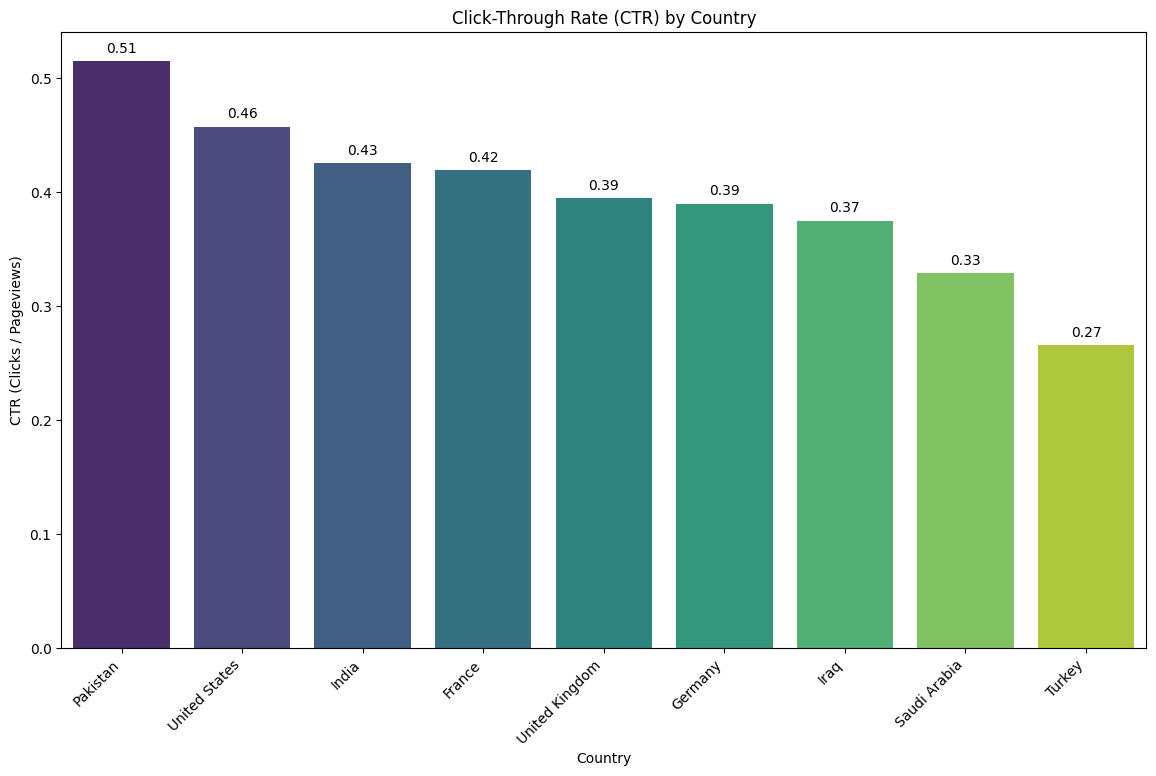

In [42]:
# Sort the data by CTR for better visualization
ctr_data = ctr_data.sort_values(by='CTR', ascending=False)

# Step 5: Plot the CTR for each country
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='country', y='CTR', data=ctr_data, palette='viridis')

# Annotate the CTR values on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.title('Click-Through Rate (CTR) by Country')
plt.xlabel('Country')
plt.ylabel('CTR (Clicks / Pageviews)')
plt.xticks(rotation=45, ha='right')
plt.show()


## Average CTR in the given dataset

Pakistan has the highest click through rate converison 51% followed by US 46% and India 43%.

In [43]:
click_df_sample = df[df['event']=='click'].shape[0]

In [44]:
pageview_df_sample = df[df['event']=='pageview'].shape[0]

In [45]:
click_df_sample/pageview_df_sample*100

39.24496407944781

## Overall CTR of the given dataset is around 39%.

### Plotting pageview and click graph for each date.

In [46]:
def plot_event_counts_per_day(df):
    """
    Plot the number of clicks and pageviews per day using Plotly.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    """
    # Filter the DataFrame for 'clicks' and 'pageviews' events
    filtered_df = df[df['event'].isin(['click', 'pageview'])]

    # Group by 'date' and 'event', then count the occurrences
    event_counts = filtered_df.groupby(['date', 'event']).size().reset_index(name='count')

    # Pivot the DataFrame to have 'date' as rows and 'event' types as columns
    pivot_df = event_counts.pivot(index='date', columns='event', values='count').fillna(0)

    # Create a line plot with Plotly Express
    fig = px.line(
        pivot_df,
        title='Daily Clicks and Pageviews',
        labels={'value': 'Count', 'date': 'Date'},
        markers=True
    )

    # Update layout for better appearance
    fig.update_layout(
        xaxis_title='Date',
        yaxis_title='Count',
        xaxis_title_font=dict(size=14),
        yaxis_title_font=dict(size=14),
        xaxis_tickformat='%Y-%m-%d',  # Format the date on the x-axis
        xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
        plot_bgcolor='white'  # Set plot background color to white
    )

    # Show the plot
    fig.show()

# Example usage:
plot_event_counts_per_day(df)


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## Day wise CTR %

In [47]:
def calculate_ctr_per_day(df):
    """
    Calculate Click-Through Rate (CTR) for each date.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data with columns ['event', 'date'].

    Returns:
    pd.DataFrame: DataFrame containing CTR by date.
    """
    # Filter the DataFrame for 'clicks' and 'pageviews'
    filtered_df = df[df['event'].isin(['click', 'pageview'])]

    # Group by 'date' and 'event', then count the occurrences
    daily_event_counts = filtered_df.groupby(['date', 'event']).size().reset_index(name='count')

    # Pivot the DataFrame to have 'date' as rows and 'event' types as columns
    pivot_df = daily_event_counts.pivot(index='date', columns='event', values='count').fillna(0)

    # Calculate CTR for each date
    pivot_df['CTR'] = pivot_df['click'] / pivot_df['pageview']

    # Replace infinity and NaN with 0 for better readability
    pivot_df['CTR'] = pivot_df['CTR'].replace([float('inf'), -float('inf')], 0).fillna(0)

    # Reset index to make 'date' a column for better readability
    pivot_df = pivot_df.reset_index()

    return pivot_df


ctr_per_day = calculate_ctr_per_day(df)
print(ctr_per_day)


event       date  click  pageview       CTR
0     2021-08-19   9203     22356  0.411657
1     2021-08-20   8501     21368  0.397838
2     2021-08-21   8071     21349  0.378050
3     2021-08-22   7854     20430  0.384435
4     2021-08-23   7314     18645  0.392277
5     2021-08-24   7301     18685  0.390741
6     2021-08-25   7476     19147  0.390453


In [48]:
def calculate_ctr(df):
    """
    Calculate the overall Click-Through Rate (CTR) and CTR by link.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data with columns ['event', 'linkid'].

    Returns:
    overall_ctr (float): The overall Click-Through Rate.
    ctr_by_link (pd.DataFrame): DataFrame containing CTR by link.
    """
    # Filter the DataFrame for 'clicks' and 'pageviews'
    filtered_df = df[df['event'].isin(['click', 'pageview'])]

    # Calculate total clicks and total pageviews
    total_clicks = filtered_df[filtered_df['event'] == 'click'].shape[0]
    total_pageviews = filtered_df[filtered_df['event'] == 'pageview'].shape[0]

    # Calculate overall CTR
    if total_pageviews > 0:
        overall_ctr = total_clicks / total_pageviews
    else:
        overall_ctr = 0

    # Calculate CTR by link
    # Pivot the DataFrame to get counts for each link and event
    link_event_counts = filtered_df.groupby(['linkid', 'event']).size().unstack(fill_value=0)

    # Calculate CTR for each link
    link_event_counts['CTR'] = link_event_counts['click'] / link_event_counts['pageview']

    # Replace infinity and NaN with 0 for better readability
    link_event_counts['CTR'] = link_event_counts['CTR'].replace([float('inf'), -float('inf')], 0).fillna(0)

    return overall_ctr, link_event_counts[['CTR']]

# Example usage:
overall_ctr, ctr_by_link = calculate_ctr(df)
print(f'Overall CTR: {overall_ctr:.4f}')
print('CTR by Link:')
print(ctr_by_link)


Overall CTR: 0.3924
CTR by Link:
event                                 CTR
linkid                                   
00073307-ae96-5089-a117-4783afb42f8e  0.0
00126b32-0c35-507b-981c-02c80d2aa8e7  1.0
0018cfff-50a1-5984-9715-01ef2d11a49a  0.0
0033934b-5d16-5a06-af58-d087bcdd3680  0.0
0034d6cf-3bd8-5ffe-aafc-b3959fc48608  0.0
...                                   ...
fff38ca0-8043-50cd-a5f1-f65ebb7105c5  1.0
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7  0.0
fff84c0e-90a1-59d8-9997-adc909d50e16  1.0
fffc17a7-f935-5d3e-bd3e-d761fd80d479  0.5
fffd0045-29de-522b-b5d8-35786363bf07  0.5

[3822 rows x 1 columns]


- What is the overall click-through rate (CTR) calculated as clicks/pageviews?

- How does the CTR vary across different links?

In [49]:
def calculate_ctr(df):
    """
    Calculate the overall Click-Through Rate (CTR) and CTR by link.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data with columns ['event', 'linkid'].

    Returns:
    overall_ctr (float): The overall Click-Through Rate.
    ctr_by_link (pd.DataFrame): DataFrame containing CTR by link.
    """
    # Filter the DataFrame for 'clicks' and 'pageviews'
    filtered_df = df[df['event'].isin(['click', 'pageview'])]

    # Calculate total clicks and total pageviews
    total_clicks = filtered_df[filtered_df['event'] == 'click'].shape[0]
    total_pageviews = filtered_df[filtered_df['event'] == 'pageview'].shape[0]

    # Calculate overall CTR
    if total_pageviews > 0:
        overall_ctr = total_clicks / total_pageviews
    else:
        overall_ctr = 0

    # Calculate CTR by link
    # Pivot the DataFrame to get counts for each link and event
    link_event_counts = filtered_df.groupby(['isrc', 'event']).size().unstack(fill_value=0)

    # Calculate CTR for each link
    link_event_counts['CTR'] = link_event_counts['click'] / link_event_counts['pageview']

    # Replace infinity and NaN with 0 for better readability
    link_event_counts['CTR'] = link_event_counts['CTR'].replace([float('inf'), -float('inf')], 0).fillna(0)

    return overall_ctr, link_event_counts[['CTR']]


overall_ctr, ctr_by_link = calculate_ctr(df)
print(f'Overall CTR: {overall_ctr:.4f}')
print('CTR by Link:')
print(ctr_by_link.sort_values(by='CTR', ascending=False))


Overall CTR: 0.3924
CTR by Link:
event          CTR
isrc              
QZQLR2005915  92.3
US2S70765006   2.0
USUM72112298   2.0
US38W1837601   2.0
USAT21801088   2.0
...            ...
QZ93L2106845   0.0
QZAKB2014922   0.0
USUM72108039   0.0
USAT21000477   0.0
USAT22101674   0.0

[709 rows x 1 columns]


In [50]:
df[df['isrc']=='QZQLR2005915']

,event,date,country,city,artist,album,track,isrc,linkid
91,click,2021-08-23,India,Ludhiana,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
92,click,2021-08-23,India,Ludhiana,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
105,click,2021-08-23,Pakistan,Faisalabad,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
277,click,2021-08-20,Pakistan,Multan,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
335,click,2021-08-21,India,Gurgaon,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
...,...,...,...,...,...,...,...,...,...
197918,pageview,2021-08-25,Oman,Muscat,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
203813,pageview,2021-08-25,Oman,Muscat,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
208269,pageview,2021-08-24,Kuwait,Kuwait City,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
209917,pageview,2021-08-19,Saudi Arabia,Dammam,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713


In [51]:
def plot_event_counts_by_country(df):
    """
    Plot the count of events over time by country to identify trends.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data with columns ['event', 'date', 'country'].
    """
    # Group by 'date', 'country', and 'event' to get counts
    country_event_trends = df.groupby(['date', 'country', 'event']).size().reset_index(name='count')

    # Plot event trends by country
    fig = px.line(
        country_event_trends,
        x='date',
        y='count',
        color='country',
        facet_row='event',
        title='Event Counts Over Time by Country',
        labels={'count': 'Count', 'date': 'Date'},
        markers=True
    )

    fig.update_layout(xaxis_title='Date', yaxis_title='Event Count', plot_bgcolor='white')
    fig.show()

# Example usage:
plot_event_counts_by_country(df)


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [52]:
from scipy.stats import ttest_ind

def compare_means_before_after(df, event_type, cutoff_date):
    """
    Compare the means of event counts before and after a specified date.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data with columns ['date', 'event'].
    event_type (str): The type of event to test (e.g., 'click', 'pageview', 'preview').
    cutoff_date (str): The date string in 'YYYY-MM-DD' format to split the data.

    Returns:
    T-test result comparing the two periods.
    """
    # Filter the data for the specified event type
    event_data = df[df['event'] == event_type]

    # Group by 'date' and sum the event counts
    daily_counts = event_data.groupby('date').size().reset_index(name='count')

    # Split the data into before and after the cutoff date
    before = daily_counts[daily_counts['date'] < cutoff_date]['count']
    after = daily_counts[daily_counts['date'] >= cutoff_date]['count']

    # Perform an independent t-test
    t_stat, p_value = ttest_ind(before, after, equal_var=False)

    return t_stat, p_value

# Example usage:
event_type = 'click'
cutoff_date = '2021-08-20'
t_stat, p_value = compare_means_before_after(df, event_type, cutoff_date)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: nan, P-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning:

divide by zero encountered in divide

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning:

invalid value encountered in scalar multiply



In [53]:
import statsmodels.api as sm

def regression_analysis(df, event_type):
    """
    Perform OLS regression to check if time is a significant predictor of event counts.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data with columns ['date', 'event'].
    event_type (str): The type of event to test (e.g., 'click', 'pageview', 'preview').

    Returns:
    OLS regression summary.
    """
    # Filter the data for the specified event type
    event_data = df[df['event'] == event_type]

    # Group by 'date' and sum the event counts
    daily_counts = event_data.groupby('date').size().reset_index(name='count')

    # Create an integer-based time variable
    daily_counts['time'] = np.arange(len(daily_counts))

    # Add a constant to the independent variables
    X = sm.add_constant(daily_counts['time'])
    y = daily_counts['count']

    # Fit the OLS model
    model = sm.OLS(y, X).fit()

    return model.summary()

# Example usage:
event_type = 'click'
print(regression_analysis(df, event_type))


                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     26.74
Date:                Thu, 05 Sep 2024   Prob (F-statistic):            0.00355
Time:                        17:04:10   Log-Likelihood:                -48.790
No. Observations:                   7   AIC:                             101.6
Df Residuals:                       5   BIC:                             101.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8853.3571    207.616     42.643      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 7 samples were given.



- Is there a correlation between clicks and previews on a link? If so, is it statistically significant, and how strong is the effect?
- Perform tests for both potential linear relationships and categorical (binary) relationships between these variables.


In [54]:
df2 = df[df['event'].isin(['click', 'pageview'])]

dataframe = df2.pivot_table(index='linkid', columns='event', aggfunc='size', fill_value=0).sort_values(by='click', ascending=False).reset_index()
dataframe['CTR'] = dataframe['click']/dataframe['pageview']
dataframe.sort_values(by='CTR', ascending=False)

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning:

invalid value encountered in subtract



event,linkid,click,pageview,CTR
1603,aee2b83d-5f50-4309-9e62-200c404d4751,1,0,inf
1654,54166799-1895-4f35-9b2f-b249c2f7a351,1,0,inf
9,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,923,10,92.3
499,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7,3,1,3.0
492,330773a6-f22a-5c7a-a3e4-7809fe8539b9,3,1,3.0
...,...,...,...,...
2768,da28ba6e-82aa-5b28-98f6-955e8f6f45fc,0,1,0.0
2767,da232b3a-405d-4e90-8f75-679f397f2b08,0,1,0.0
2766,d6f740cc-bcd2-5558-86a3-c3a523b50ef7,0,2,0.0
2765,d770e4d5-a99d-5ccd-9cee-f9d07ef9475f,0,1,0.0


In [67]:
# Total clicks and pageviews
total_clicks = df[df['event'] == 'click'].shape[0]
total_pageviews = df[df['event'] == 'pageview'].shape[0]

# Overall CTR
ctr_overall = total_clicks / total_pageviews

# CTR by link
clicks_by_link = df[df['event'] == 'click'].groupby('linkid').size()
pageviews_by_link = df[df['event'] == 'pageview'].groupby('linkid').size()

# CTR per link (if there are pageviews)
ctr_by_link = (clicks_by_link / pageviews_by_link).dropna()

print("Overall CTR:", ctr_overall)
print(ctr_by_link.head(10))  # Show top 10 links by CTR


Overall CTR: 0.3924496407944781
linkid
00126b32-0c35-507b-981c-02c80d2aa8e7    1.000000
004b9724-abca-5481-b6e9-6148a7ca00a5    1.000000
0063a982-41cd-5629-96d0-e1c4dd72ea11    0.666667
006af6a0-1f0d-4b0c-93bf-756af9071c06    0.222222
00759b81-3f04-4a61-b934-f8fb3185f4a0    0.750000
00760ee1-d400-5f81-a1a8-04cfd7e11006    1.000000
00829040-ee01-4409-966d-d67c7965144a    0.564103
008dc615-0805-5f3b-835b-40f134c57f56    0.500000
009193ee-c3df-4efa-88f2-feb37c0bfdf2    0.666667
00b2d90d-68ed-57aa-a2f6-9c3075143b30    1.000000
dtype: float64


In [55]:
def correlation_analysis(df):
    """
    Analyze the correlation between clicks and previews on a link.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data with columns ['event', 'linkid'].

    Returns:
    Correlation coefficient and p-value indicating statistical significance.
    """
    # Pivot the data to get the count of 'clicks' and 'previews' per 'linkid'
    link_event_counts = df.pivot_table(index='linkid', columns='event', aggfunc='size', fill_value=0).reset_index()

    # Calculate the Pearson correlation coefficient
    correlation, p_value = stats.pearsonr(link_event_counts['click'], link_event_counts['preview'])

    return correlation, p_value

# Example usage:
correlation, p_value = correlation_analysis(df)
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Pearson correlation coefficient: 0.9886582425305167
P-value: 0.0


# How does the CTR (clicks/pageviews ) vary across different links?


In [56]:
df1 = df[df['event'].isin(['click', 'pageview'])]

# Pivot table to get the sum of 'click' and 'pageview' events for each 'linkid'
dataframe = df1.pivot_table(index='linkid', columns='event', aggfunc='size', fill_value=0).reset_index()

# Calculate CTR (Click-Through Rate) for each linkid
dataframe['CTR'] = np.where(dataframe['pageview'] == 0, np.nan, dataframe['click'] / dataframe['pageview'])

# Sort the dataframe by CTR to analyze variations
dataframe.sort_values(by='CTR', ascending=False)

event,linkid,click,pageview,CTR
3016,c95f1fc1-fab0-4c74-b3f5-52bd3684a713,923,10,92.3
789,330773a6-f22a-5c7a-a3e4-7809fe8539b9,3,1,3.0
611,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7,3,1,3.0
3534,ec201a3e-0a1d-57ff-9803-b76fc482c38e,2,1,2.0
2940,c2d99bb2-6ea3-568c-80d3-44dc36250cbc,2,1,2.0
...,...,...,...,...
1276,53f96a1c-d5d2-5d1d-b72f-406e78d9a10d,0,3,0.0
1281,548b6882-44dd-446a-b6bc-46252c5ff5f6,0,1,0.0
0,00073307-ae96-5089-a117-4783afb42f8e,0,2,0.0
1277,54166799-1895-4f35-9b2f-b249c2f7a351,1,0,NaN


In [57]:
df[df['linkid']=='c95f1fc1-fab0-4c74-b3f5-52bd3684a713']


,event,date,country,city,artist,album,track,isrc,linkid
91,click,2021-08-23,India,Ludhiana,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
92,click,2021-08-23,India,Ludhiana,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
105,click,2021-08-23,Pakistan,Faisalabad,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
277,click,2021-08-20,Pakistan,Multan,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
335,click,2021-08-21,India,Gurgaon,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
...,...,...,...,...,...,...,...,...,...
197918,pageview,2021-08-25,Oman,Muscat,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
203813,pageview,2021-08-25,Oman,Muscat,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
208269,pageview,2021-08-24,Kuwait,Kuwait City,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713
209917,pageview,2021-08-19,Saudi Arabia,Dammam,Sidhu Moose Wala,Akhian,Akhian,QZQLR2005915,c95f1fc1-fab0-4c74-b3f5-52bd3684a713


In [58]:
df[df['linkid']=='27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7']



,event,date,country,city,artist,album,track,isrc,linkid
6149,click,2021-08-20,Brazil,Rio de Janeiro,Guga Nandes,Apaixonei De Vez,Apaixonei De Vez,NaN,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7
22098,click,2021-08-20,Brazil,Rio de Janeiro,Guga Nandes,Apaixonei De Vez,Apaixonei De Vez,NaN,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7
40527,click,2021-08-20,Brazil,Rio de Janeiro,Guga Nandes,Apaixonei De Vez,Apaixonei De Vez,NaN,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7
152206,pageview,2021-08-20,Brazil,Rio de Janeiro,Guga Nandes,Apaixonei De Vez,Apaixonei De Vez,NaN,27a91fe1-9fc0-5c28-9e9e-19ff0e7357a7


In [59]:
df1 = df[df['event'].isin(['click', 'pageview'])]

df1.pivot_table(index='linkid', columns='event', aggfunc='size', fill_value=0).sort_values(by='click', ascending=False).reset_index()


event,linkid,click,pageview
0,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692,25175
1,e849515b-929d-44c8-a505-e7622f1827e9,2198,5981
2,522da5cc-8177-4140-97a7-a84fdb4caf1c,2109,6600
3,681d888a-59ce-4acb-b7c5-95dab0c063d9,1500,3354
4,c2c876ab-b093-4750-9449-6b4913da6af3,1429,4303
...,...,...,...
3817,438ac0a7-173d-52fc-88df-8ed75b62a137,0,1
3818,43a02741-e8e9-45c5-9c90-ad2802b31df7,0,1
3819,a16bd937-4a42-57f7-ae9b-db6f0af41e9d,0,1
3820,43b97263-d23b-5740-b47e-56fafd45e582,0,1


In [60]:
df.pivot_table(index='linkid', columns='event', aggfunc='size', fill_value=0).reset_index()

event,linkid,click,pageview,preview
0,00073307-ae96-5089-a117-4783afb42f8e,0,2,0
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,0
2,0018cfff-50a1-5984-9715-01ef2d11a49a,0,1,0
3,0033934b-5d16-5a06-af58-d087bcdd3680,0,1,0
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,0,1,0
...,...,...,...,...
3817,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,0
3818,fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7,0,2,0
3819,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,0
3820,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0


# Is there a correlation between clicks and previews on a link? If so, is it statistically significant, and how strong is the effect?


Pearson correlation coefficient: 0.988680636563483
P-value: 0.0


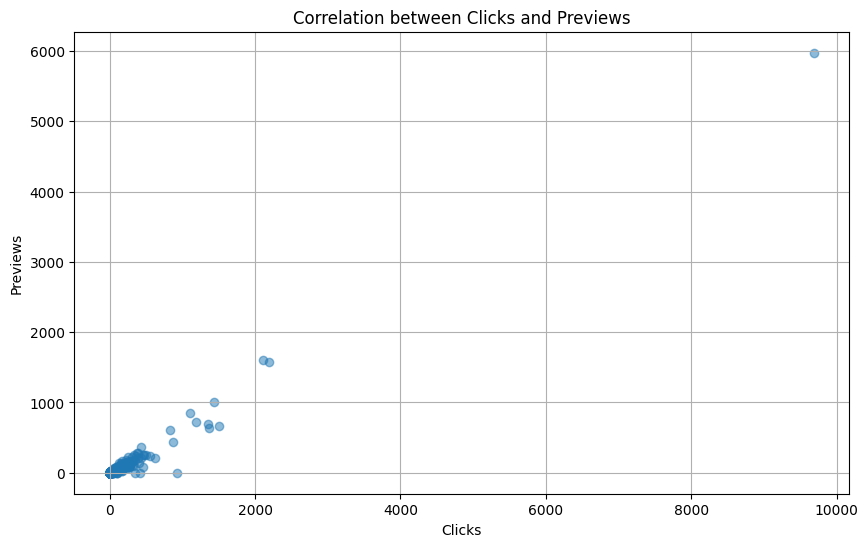

In [61]:
from scipy.stats import pearsonr

# Assuming df is your DataFrame and it's already loaded
# Filter to include only 'click' and 'preview' events
df_filtered = df[df['event'].isin(['click', 'preview'])]

# Pivot table to aggregate counts of 'click' and 'preview' by 'linkid'
pivot_df = df_filtered.pivot_table(index='linkid', columns='event', aggfunc='size', fill_value=0).reset_index()

# Calculate the Pearson correlation coefficient between 'click' and 'preview'
correlation, p_value = pearsonr(pivot_df['click'], pivot_df['preview'])

print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Optional: Visualize the correlation with a scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(pivot_df['click'], pivot_df['preview'], alpha=0.5)
plt.title('Correlation between Clicks and Previews')
plt.xlabel('Clicks')
plt.ylabel('Previews')
plt.grid(True)
plt.show()

 ## It indicates a very strong positive linear relationship between clicks and previews on each linkid.

- It indicates an almost perfect positive linear relationship between the number of clicks and previews for each linkid.
- This means that as the number of previews increases for a given linkid, the number of clicks also increases in a nearly proportional manner.
-  If a linkid has more previews, it's almost certain to have more clicks as well.

# Perform tests for both potential linear relationships and categorical (binary) relationships between these variables

In [62]:
def chi_square_test(df):
    """
    Perform a Chi-Square test to check the independence between clicks and previews.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data with columns ['event', 'linkid'].

    Returns:
    Chi-Square statistic and p-value.
    """
    # Pivot the data to get the count of 'clicks' and 'previews' per 'linkid'
    link_event_counts = df.pivot_table(index='linkid', columns='event', aggfunc='size', fill_value=0).reset_index()

    # Convert counts to binary (occurred or not)
    link_event_counts['click_binary'] = (link_event_counts['click'] > 0).astype(int)
    link_event_counts['preview_binary'] = (link_event_counts['preview'] > 0).astype(int)

    # Create a contingency table
    contingency_table = pd.crosstab(link_event_counts['click_binary'], link_event_counts['preview_binary'])

    # Perform the Chi-Square test
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    return chi2_stat, p_value

# Example usage:
chi2_stat, p_value = chi_square_test(df)
print(f"Chi-Square statistic: {chi2_stat}")
print(f"P-value: {p_value}")


Chi-Square statistic: 285.3614049967925
P-value: 5.0967328818757874e-64


##

In [64]:
import statsmodels.api as sm

# Filter out 'click' and 'preview' data
df_filtered = df[df['event'].isin(['click', 'preview'])]

# Pivot to create a dataframe where rows are 'linkid' and columns are 'click' and 'preview' counts
df_pivot = df_filtered.pivot_table(index='linkid', columns='event', aggfunc='size', fill_value=0).reset_index()

# Independent variable (X) will be 'preview' counts and dependent variable (y) will be 'click' counts
X = df_pivot['preview']
y = df_pivot['click']

# Add a constant to the independent variable (preview)
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  click   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 9.879e+04
Date:                Thu, 05 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:04:11   Log-Likelihood:                -11302.
No. Observations:                2277   AIC:                         2.261e+04
Df Residuals:                    2275   BIC:                         2.262e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4044      0.729      6.045      0.0

## Interpretation:
1. Strong Linear Relationship: The very high R-squared value (0.977) indicates a strong linear relationship between previews and clicks.
2. Statistically Significant: The p-values for both the constant and the preview coefficient are extremely low, indicating that the relationship is statistically significant.
3. Positive Correlation: The positive coefficient for previews (1.6015) indicates that an increase in previews is associated with an increase in clicks.

There is a strong, positive, and statistically significant relationship between the number of previews and the number of clicks on a given link. The model fits the data well, explaining nearly all of the variation in clicks with the number of previews.

In [65]:
previews = df[df['event'] == 'preview'].groupby('linkid').count().sum()
clicks = df[df['event'] == 'click'].groupby('linkid').count().sum()

# Align the previews and clicks by their indices (linkid)
data = pd.concat([previews, clicks], axis=1, keys=['preview', 'click']).dropna()

# Extract X (previews) and y (clicks) ensuring they are numeric
X = data['preview'].astype(float)
y = data['click'].astype(float)

# Add a constant to the independent variable (preview)
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  click   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 05 Sep 2024   Prob (F-statistic):                nan
Time:                        17:04:12   Log-Likelihood:                -64.127
No. Observations:                   8   AIC:                             130.3
Df Residuals:                       7   BIC:                             130.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
preview        1.9433      0.010    200.155      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=8



In [66]:
import statsmodels.api as sm

# Filter out 'click' and 'preview' data
df_filtered = df[df['event'].isin(['click', 'preview'])]

# Pivot to create a dataframe where rows are 'linkid' and columns are 'click' and 'preview' counts
df_pivot = df_filtered.pivot_table(index='linkid', columns='event', aggfunc='size', fill_value=0).reset_index()

# Independent variable (X) will be 'preview' counts and dependent variable (y) will be 'click' counts
X = df_pivot['click']
y = df_pivot['preview']

# Add a constant to the independent variable (preview)
X = sm.add_constant(X)

# Perform linear regression
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                preview   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 9.879e+04
Date:                Thu, 05 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:04:12   Log-Likelihood:                -10203.
No. Observations:                2277   AIC:                         2.041e+04
Df Residuals:                    2275   BIC:                         2.042e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4062      0.451     -5.340      0.0

---

## Summary of Pageview and Event Data

### Total and Average Pageview Events

| Metric                      | Value    |
|-----------------------------|----------|
| **Total Pageview Events**   | 62% of total events |
| **Average Pageviews per Day** | 20,282   |

### Distribution of Other Events

| Event Type | Percentage of Total Events | Average Events per Day |
|------------|-----------------------------|------------------------|
| **Clicks** | 34%                         | 7,960                  |
| **Previews** | 18%                        | 4,075                  |

**Overall Average Events per Day**: 32,318.57

### Country-wise Top 10 Event Counts

| Event     | Country          | Count |
|-----------|------------------|-------|
| Pageview  | Saudi Arabia     | 28,873|
| Pageview  | India            | 27,286|
| Pageview  | United States    | 20,816|
| Click     | India            | 11,609|
| Pageview  | France           | 9,674 |
| Click     | United States    | 9,523 |
| Click     | Saudi Arabia     | 9,495 |
| Preview   | Saudi Arabia     | 8,966 |
| Pageview  | Iraq             | 4,897 |
| Preview   | India            | 4,097 |

### Country-wise Click-Through Rate (CTR)

| Country          | Click Count | Pageview Count | CTR      |
|------------------|-------------|----------------|----------|
| India            | 11,609      | 27,286         | 0.425456 |
| Saudi Arabia     | 9,495       | 28,873         | 0.328854 |
| France           | 4,054       | 9,674          | 0.419061 |
| United States    | 9,523       | 20,816         | 0.457485 |
| Iraq             | 1,836       | 4,897          | 0.374923 |
| United Kingdom   | 1,517       | 3,845          | 0.394538 |
| Turkey           | 654         | 2,462          | 0.265638 |
| Germany          | 1,224       | 3,140          | 0.389809 |
| Pakistan         | 1,653       | 3,212          | 0.514633 |

### Day-wise Click-Through Rate (CTR)

| Date       | Click | Pageview | CTR      |
|------------|-------|----------|----------|
| 2021-08-19 | 9,203 | 22,356   | 0.411657 |
| 2021-08-20 | 8,501 | 21,368   | 0.397838 |
| 2021-08-21 | 8,071 | 21,349   | 0.378050 |
| 2021-08-22 | 7,854 | 20,430   | 0.384435 |
| 2021-08-23 | 7,314 | 18,645   | 0.392277 |
| 2021-08-24 | 7,301 | 18,685   | 0.390741 |
| 2021-08-25 | 7,476 | 19,147   | 0.390453 |

**Overall CTR**: 0.392

### Link-ID CTR Distribution

| Link ID                                    | CTR   |
|--------------------------------------------|-------|
| 00126b32-0c35-507b-981c-02c80d2aa8e7      | 1.000 |
| 004b9724-abca-5481-b6e9-6148a7ca00a5      | 1.000 |
| 0063a982-41cd-5629-96d0-e1c4dd72ea11      | 0.667 |
| 006af6a0-1f0d-4b0c-93bf-756af9071c06      | 0.222 |
| 00759b81-3f04-4a61-b934-f8fb3185f4a0      | 0.750 |
| 00760ee1-d400-5f81-a1a8-04cfd7e11006      | 1.000 |
| ...                                        | ...   |
| ffff84c0e-90a1-59d8-9997-adc909d50e16     | 1.000 |
| fff38ca0-8043-50cd-a5f1-f65ebb7105c5      | 1.000 |
| ffff17a7-f935-5d3e-bd3e-d761fd80d479      | 0.500 |
| ffffd0045-29de-522b-b5d8-35786363bf07     | 0.500 |

### Pearson Correlation between Previews and Clicks on Link ID

- **Pearson Correlation Coefficient**: 0.989

---

This summary provides a comprehensive view of the pageview and event data, including daily averages, country-wise distributions, and CTR metrics.